In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Activation, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from os import listdir
from os.path import isfile, isdir, join
import matplotlib.pyplot as plt

In [9]:
## Creación de un directorio que contenga las imagenes de validación y entrenamiento

import os, shutil, pathlib
original_dir = pathlib.Path("cat_dog")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'cats_vs_dogs_small\\train\\cat'

In [26]:
train_dir = 'cats_vs_dogs_small/train'
test_dir = 'cats_vs_dogs_small/test'

ih, iw = 150, 150 #tamaño de la imagen
input_shape =( ih, iw, 3) #forma de la imagen: alto, ancho y numero de canales

num_class = 2 #clases
epochs = 10

batch_size = 50
num_train = 1500
num_test = 1000

epoch_steps = num_train//batch_size
test_steps = num_test//batch_size

gentrain = ImageDataGenerator(rescale=1/255)


train = gentrain.flow_from_directory(train_dir,
                                     batch_size = batch_size,
                                     target_size = ( ih, iw,),
                                     class_mode = 'binary')

gentest = ImageDataGenerator(rescale=1/255)


test = gentest.flow_from_directory(test_dir,
                                     batch_size = batch_size,
                                     target_size = ( ih, iw,),
                                     class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Filtros y red neuronal

Dado que la salida de la red neuronal está entre 0 y 1, conviene hacer un reescalamiento de esta misma usando `ImageDataGenerator(rescale=1/255)`ya que la intensidad de los pixeles va de 0 a 255. Tambien conviene transformar todas la forma de entrada de las imagenes a 150 x 150 pixeles.

Despues se elige un modelo secuencial con una capa de entrada del tamaño de la imagen conectada a una capa convolucional de dos dimensiones con 10 filtros donde los pixeles que caen en la ventana de atención de 3x3 a la salida de esta capa se le hace un Maxpooling.



In [28]:
model = Sequential()
model.add(Conv2D(10, (3,3), input_shape = ( iw, ih, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(train,
                    steps_per_epoch = epoch_steps,
                    epochs = epochs,
                    validation_data = test,
                    validation_steps = test_steps)

history = model.fit(train, epochs=epochs, validation_data=test)
          

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 528ms/step - accuracy: 0.4922 - loss: 0.7048 - val_accuracy: 0.5160 - val_loss: 0.6870
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.4985 - loss: 0.6868 - val_accuracy: 0.5300 - val_loss: 0.6819
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - accuracy: 0.5657 - loss: 0.6712 - val_accuracy: 0.6700 - val_loss: 0.6423
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.6641 - loss: 0.6337 - val_accuracy: 0.5960 - val_loss: 0.6552
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 504ms/step - accuracy: 0.6501 - loss: 0.6264 - val_accuracy: 0.7010 - val_loss: 0.6001
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 250ms/step - accuracy: 0.6795 - loss: 0.5829 - val_accuracy: 0.7070 - val_loss: 0.5993
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - accuracy: 0.7194 - loss: 0.5543 - val_accuracy: 0.6920 - val_loss: 0.5880
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.6920 - loss: 0.5794 - val_accuracy

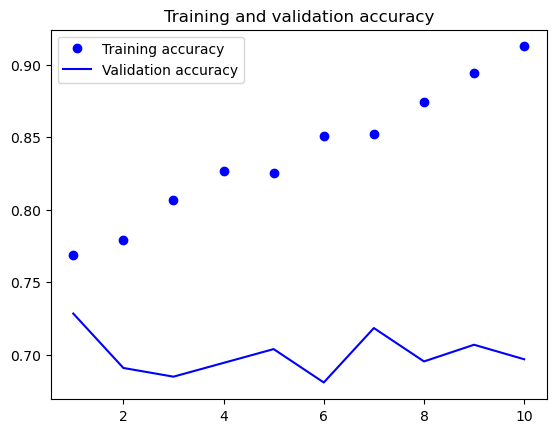

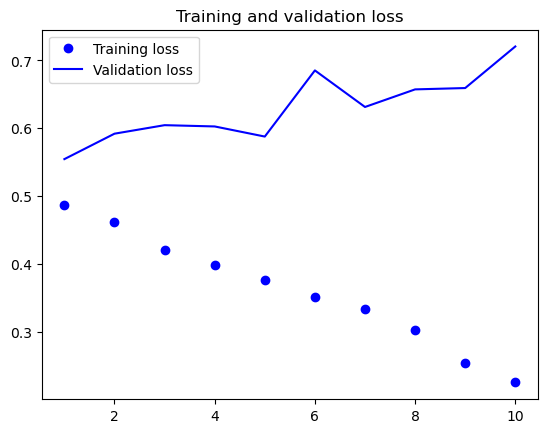

In [30]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()